In [3]:
import pandas as pd
import numpy as np

import seaborn as sns

from datetime import datetime



## Number of tweets in english (no retweets) since 2021

In [18]:
# Counting tweets about 
!twarc2 counts --archive --csv --granularity day "(#BTC OR #BITCOIN OR #btc OR #bitcoin $btc $BTC) lang:en -is:retweet" --start-time "2012-01-01" data/BTC_Counts.csv



100%|████████| Processed 10 years/10 years [05:05<00:00, 58880503 tweets total ]


In [4]:
# Load the csv with the number of tweets per day
btc_c = pd.read_csv("data/BTC_Counts.csv")
btc_c.head()

,start,end,day_count
0,2022-02-16T00:00:00.000Z,2022-02-17T00:00:00.000Z,98766
1,2022-02-17T00:00:00.000Z,2022-02-18T00:00:00.000Z,96727
2,2022-02-18T00:00:00.000Z,2022-02-19T00:00:00.000Z,88957
3,2022-02-19T00:00:00.000Z,2022-02-20T00:00:00.000Z,79656
4,2022-02-20T00:00:00.000Z,2022-02-21T00:00:00.000Z,83036


In [5]:
# Create columns of month and year
btc_c['start'] = pd.to_datetime(btc_c['start'])
btc_c['month'] = btc_c['start'].dt.month
btc_c['year'] = btc_c['start'].dt.year

In [6]:
# Grouped by month data set
btc_m = btc_c.groupby(['year', 'month']).sum()['day_count'].reset_index()
btc_m.sort_values(by=['year', 'month'])

,year,month,day_count
0,2012,1,6930
1,2012,2,6900
2,2012,3,11238
3,2012,4,8814
4,2012,5,7318
...,...,...,...
118,2021,11,2241599
119,2021,12,2152553
120,2022,1,2415882
121,2022,2,2638554


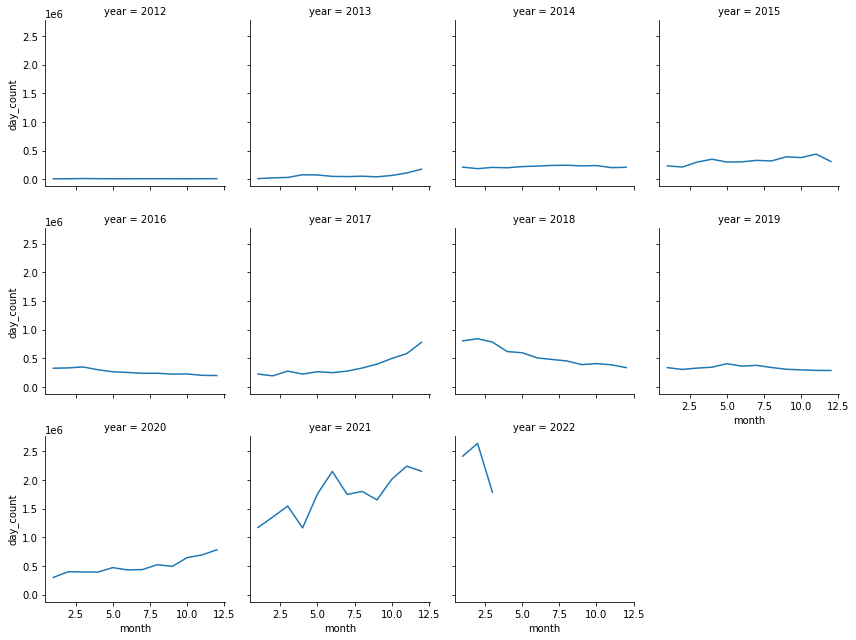

In [13]:
# Plot of the number of tweet per year, month
g = sns.FacetGrid(btc_m, col="year", col_wrap=4)
g.map(sns.lineplot, "month", "day_count")

{2012: 96280, 2013: 749684, 2014: 2609197, 2015: 3851363, 2016: 3148513, 2017: 4289668, 2018: 6595957, 2019: 3977289, 2020: 5967899, 2021: 20752738, 2022: 6841915}


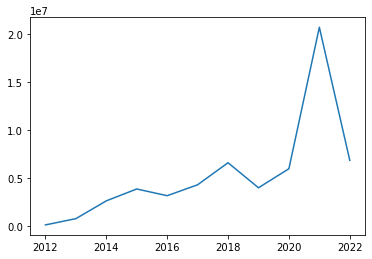

In [23]:
# Total tweets per year
peryear = dict(btc_m.groupby(['year']).sum()['day_count'])
sns.lineplot(x = peryear.keys(), y = peryear.values())
print(peryear)

In [8]:
btc_m[btc_m['year'] == 2021]

,year,month,day_count
108,2021,1,1171991
109,2021,2,1354776
110,2021,3,1544601
111,2021,4,1164731
112,2021,5,1756308
113,2021,6,2149770
114,2021,7,1747927
115,2021,8,1802005
116,2021,9,1653033
117,2021,10,2013444


2021 is a very interesting year for the Bitcoin, so lets try to download data from this year

## Downloading the tweets about Bitcoin for 2021

In [25]:
# July 2021
!twarc2 search --archive --start-time "2021-07-01" --end-time "2021-07-31" "(#BTC OR #BITCOIN OR #btc OR #bitcoin $btc $BTC) lang:en -is:retweet" data/tweets_2107.jsonl
!twarc2 csv data/tweets_2107.jsonl data/tweets_2107.csv

100%|████████| Processed 30 days/30 days [14:16:40<00:00, 1482456 tweets total ]
100%|██████████████| Processed 7.13G/7.13G of input file [30:09<00:00, 4.23MB/s]

ℹ️
Parsed 1482456 tweets objects from 16977 lines in the input file.
Wrote 1482456 rows and output 74 columns in the CSV.



In [46]:
# August 2021
!twarc2 search --archive --start-time "2021-08-01" --end-time "2021-08-31" "(#BTC OR #BITCOIN OR #btc OR #bitcoin $btc $BTC) lang:en -is:retweet" data/tweets_2108.jsonl
!twarc2 csv data/tweets_2108.jsonl data/tweets_2108.csv

100%|████████| Processed 30 days/30 days [14:44:13<00:00, 1567452 tweets total ]
100%|██████████████| Processed 7.46G/7.46G of input file [31:00<00:00, 4.30MB/s]

ℹ️
Parsed 1567452 tweets objects from 17527 lines in the input file.
Wrote 1567452 rows and output 74 columns in the CSV.



In [50]:
# September 2021
!twarc2 search --archive --start-time "2021-09-01" --end-time "2021-09-30" "(#BTC OR #BITCOIN OR #btc OR #bitcoin $btc $BTC) lang:en -is:retweet" data/tweets_2109.jsonl
!twarc2 csv data/tweets_2109.jsonl data/tweets_2109.csv

100%|████████| Processed 29 days/29 days [13:32:10<00:00, 1533671 tweets total ]
100%|██████████████| Processed 7.56G/7.56G of input file [29:10<00:00, 4.64MB/s]

ℹ️
Parsed 1533671 tweets objects from 16070 lines in the input file.
Wrote 1533671 rows and output 74 columns in the CSV.



In [5]:
# October 2021
!twarc2 search --archive --start-time "2021-10-01" --end-time "2021-10-31" "(#BTC OR #BITCOIN OR #btc OR #bitcoin $btc $BTC) lang:en -is:retweet" data/tweets_2110.jsonl
!twarc2 csv data/tweets_2110.jsonl data/tweets_2110.csv

100%|████████| Processed 30 days/30 days [16:16:59<00:00, 1924751 tweets total ]
100%|██████████████| Processed 9.60G/9.60G of input file [36:59<00:00, 4.64MB/s]

ℹ️
Parsed 1924751 tweets objects from 19390 lines in the input file.
Wrote 1924751 rows and output 74 columns in the CSV.



In [ ]:
# November 2021
!twarc2 search --archive --start-time "2021-11-01" --end-time "2021-11-30" "(#BTC OR #BITCOIN OR #btc OR #bitcoin $btc $BTC) lang:en -is:retweet" data/tweets_2111.jsonl
!twarc2 csv data/tweets_2111.jsonl data/tweets_2111.csv

 43%|██▌   | Processed 12 days/29 days [12:51:36<11:21:33, 935319 tweets total ]

In [3]:
df = pd.read_csv("data/tweets_2110.csv", usecols = ['id', 'conversation_id', 'author_id', 'created_at', 'text', 'lang',
                                                    'source', 'public_metrics.like_count', 'public_metrics.quote_count', 'public_metrics.reply_count', 
                                                    'public_metrics.retweet_count', 'entities.annotations', 'entities.cashtags', 'author.username', 'author.public_metrics.followers_count',
                                                    'author.public_metrics.following_count', 'author.public_metrics.listed_count', 'geo.country', 'geo.country_code'])

In [4]:
df.to_csv("data/tweets_2110_s.csv")
df.sample(frac = 0.1, random_state = 123).to_csv("data/tweets_2110_s10.csv")

In [29]:
len(df.columns)

23

In [34]:
!twarc2 search --archive --limit 100 --tweet-fields "id,author_id,created_at,public_metrics,text,lang,geo" --user-fields "username,public_metrics" --start-time "2021-07-01" --end-time "2021-07-31" "(#BTC OR #BITCOIN OR #btc OR #bitcoin $btc $BTC) lang:en -is:retweet" data/prueba.jsonl
!twarc2 csv data/prueba.jsonl data/prueba.csv



Set --limit of 100 reached:   0%| | Processed 10 minutes/30 days [00:03<3:42:05,
100%|████████████████| Processed 361k/361k of input file [00:00<00:00, 1.30MB/s]

ℹ️
Parsed 472 tweets objects from 1 lines in the input file.
Wrote 472 rows and output 74 columns in the CSV.



In [37]:
prueba_df = pd.read_csv("data/prueba.csv")
len(prueba_df.columns)
prueba_df.columns

Index(['id', 'conversation_id', 'referenced_tweets.replied_to.id',
       'referenced_tweets.retweeted.id', 'referenced_tweets.quoted.id',
       'author_id', 'in_reply_to_user_id', 'retweeted_user_id',
       'quoted_user_id', 'created_at', 'text', 'lang', 'source',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'public_metrics.reply_count', 'public_metrics.retweet_count',
       'reply_settings', 'possibly_sensitive', 'withheld.scope',
       'withheld.copyright', 'withheld.country_codes', 'entities.annotations',
       'entities.cashtags', 'entities.hashtags', 'entities.mentions',
       'entities.urls', 'context_annotations', 'attachments.media',
       'attachments.media_keys', 'attachments.poll.duration_minutes',
       'attachments.poll.end_datetime', 'attachments.poll.id',
       'attachments.poll.options', 'attachments.poll.voting_status',
       'attachments.poll_ids', 'author.id', 'author.created_at',
       'author.username', 'author.name', 'author

In [42]:
prueba_df[[i for i in prueba_df.columns[58:60]]]

,author.withheld.country_codes,geo.coordinates.coordinates
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
467,NaN,NaN
468,NaN,NaN
469,NaN,NaN
470,NaN,NaN
